<a href="https://colab.research.google.com/github/einbulinda/mlds_course/blob/travel_aggregator_analysis/travel_agg_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Travel Aggregator Analysis

**Objective**
In depth analysis of data collected by a travel aggregator firm.

## Libraries Required
Loading of the libraries for the analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Datasets
Loading of the datasets for the analysis

In [2]:
bookings_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Edureka School Projects/Travel Aggregator Analysis/datasets/Bookings.csv')
sessions_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Edureka School Projects/Travel Aggregator Analysis/datasets/Sessions.csv')

Get overview information about the datasets given.

In [3]:
bookings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 339 entries, 0 to 338
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        339 non-null    object 
 1   booking_id         339 non-null    object 
 2   from_city          339 non-null    object 
 3   from_country       339 non-null    object 
 4   to_city            339 non-null    object 
 5   to_country         339 non-null    object 
 6   booking_time       339 non-null    object 
 7   device_type_used   339 non-null    object 
 8   INR_Amount         339 non-null    float64
 9   service_name       339 non-null    object 
 10  no_of_passengers   339 non-null    float64
 11  days_to_departure  339 non-null    float64
 12  distance_km        339 non-null    float64
dtypes: float64(4), object(9)
memory usage: 34.6+ KB


In [4]:
sessions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1497 entries, 0 to 1496
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   session_id             1497 non-null   object
 1   search_id              1497 non-null   object
 2   search_time            1497 non-null   object
 3   session_starting_time  1497 non-null   object
 4   booking_id             366 non-null    object
dtypes: object(5)
memory usage: 58.6+ KB


## Distinct Counts of Bookings, Sessions, and Searches
1.  Find the number of distinct bookings, sessions, and searches from the given datasets.

In [5]:
#Calculate the Distinct counts

distinct_info = {
    'Bookings': bookings_df['booking_id'].nunique(),
    'Sessions': sessions_df['session_id'].nunique(),
    'Searches': sessions_df['search_id'].nunique()
}

#Convert to a DataFrame
df_distinct_info = pd.DataFrame(distinct_info.items(), columns = ['Metric','Totals']).set_index('Metric')

df_distinct_info

,Totals
Metric,
Bookings,339
Sessions,331
Searches,1360


The visual representation of the findings is as below:

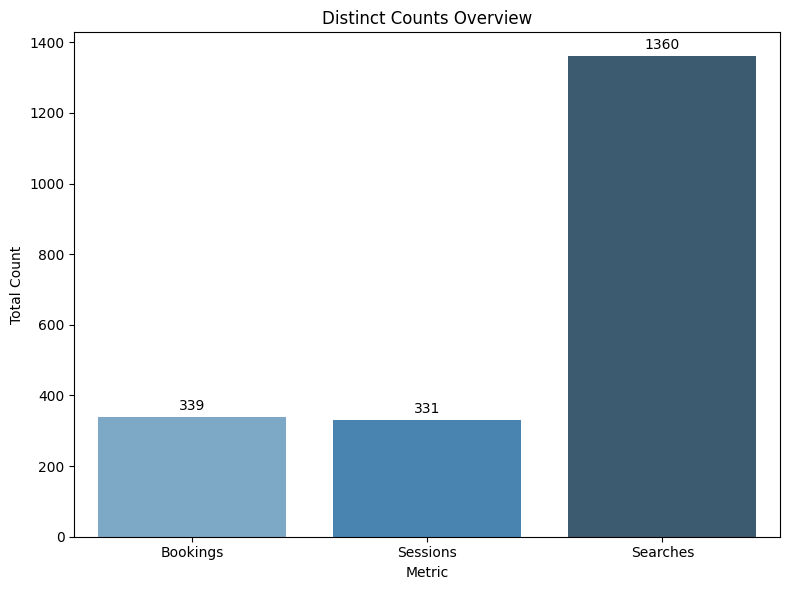

In [6]:
# Reset index for seaborn
df_plot = df_distinct_info.reset_index().rename(columns={'index':'Metric'})


# Create Plot
plt.figure(figsize=(8, 6))
ax = sns.barplot(data=df_plot, x='Metric', y='Totals',hue='Metric', palette='Blues_d', legend=False)

# Add Data Labels on Top of Bars
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=3)

# Set Title and Labels
plt.title('Distinct Counts Overview')
plt.ylabel('Total Count')
plt.xticks(ha='center')
plt.tight_layout()
plt.show()

## Number of Sessions with Multiple Bookings
2.  How many sessions have more than one booking?

In [7]:
# Drop the sessions with booking_id as NaN
filtered_sessions_df = sessions_df.dropna(subset=['booking_id'])

# Group by session ID and Count Unique Booking IDs. This ignores a duplicated booking ID for same session.
session_counts = filtered_sessions_df.groupby('session_id')['booking_id'].nunique()

# Filter sessions with more than one booking ID
session_to_multiple_bookings = session_counts[session_counts > 1].index

print(f"Session with more than one bookings: {len(session_to_multiple_bookings)}")


Session with more than one bookings: 10


In [8]:
#Sessions with multiple bookings filter
result_df = sessions_df[sessions_df['session_id'].isin(session_to_multiple_bookings) & sessions_df['booking_id'].notna()]
result_df

,session_id,search_id,search_time,session_starting_time,booking_id
104,session_298,search_1344,2018-09-25T16:16:45.289Z,2018-09-25T16:10:52.146Z,booking_75
107,session_298,search_1253,2018-09-25T16:22:05.569Z,2018-09-25T16:10:52.146Z,booking_38
122,session_154,search_489,2020-01-28T16:45:12.261Z,2020-01-28T16:11:01.369Z,booking_313
129,session_154,search_571,2020-01-28T16:33:27.078Z,2020-01-28T16:11:01.369Z,booking_278
208,session_196,search_1017,2020-03-02T11:40:44.719Z,2020-03-02T11:40:18Z,booking_303
216,session_196,search_1047,2020-03-02T11:47:43.499Z,2020-03-02T11:40:18Z,booking_115
340,session_76,search_179,2018-12-01T20:54:35.192Z,2018-12-01T19:56:55.162Z,booking_154
344,session_76,search_34,2018-12-01T19:57:30.288Z,2018-12-01T19:56:55.162Z,booking_142
346,session_76,search_34,2018-12-01T19:57:30.288Z,2018-12-01T19:56:55.162Z,booking_142
371,session_324,search_125,2018-09-11T14:05:12.123Z,2018-09-11T14:04:54.935Z,booking_121


In [9]:
# Check the number of bookings per session with multiple bookings
result_df['session_id'].value_counts()

,count
session_id,
session_134,3
session_76,3
session_154,2
session_298,2
session_324,2
session_196,2
session_50,2
session_27,2
session_290,2


## Booking Distribution by Day of the Week
---
3.  Which days of the week have the highest number of bookings?
Also, draw a pie chart to show the distribution for all days of the week?

In [10]:
# Convert booking_time column to a datetime object
bookings_df['booking_time'] = pd.to_datetime(bookings_df['booking_time'])

In [11]:
# Extract Weekday Name
bookings_df['weekday'] = bookings_df['booking_time'].dt.day_name().copy()


In [12]:
# Group by weekday and count number of bookings
weekday_bookings = bookings_df.groupby('weekday').size().reset_index(name='count')

weekday_bookings

,weekday,count
0,Friday,51
1,Monday,51
2,Saturday,44
3,Sunday,35
4,Thursday,65
5,Tuesday,59
6,Wednesday,34


In [13]:
# Another method to achieve the same result.
bookings_per_weekday = bookings_df['weekday'].value_counts().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
bookings_per_weekday

,count
weekday,
Monday,51
Tuesday,59
Wednesday,34
Thursday,65
Friday,51
Saturday,44
Sunday,35


Plotting of the pie chart for the weekdays bookings count.

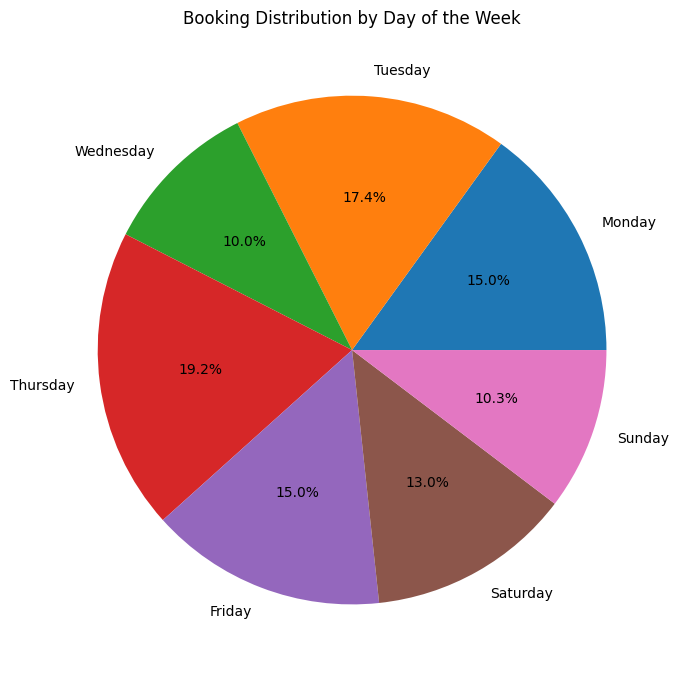

In [14]:
bookings_per_weekday.plot.pie(autopct='%1.1f%%',figsize=(7, 7), legend=False)
plt.title('Booking Distribution by Day of the Week')
plt.ylabel('')
plt.tight_layout()
plt.show()

## Total Bookings and Gross Booking Value by Service
4.  For each of the service names, display the total number of bookings and the total Gross Booking Value in INR.

In [15]:
# Group by Service Name and get the count of bookings for each and sum INR Amount for the bookings.
bookings_df.groupby('service_name').agg({'booking_id':'count','INR_Amount':'sum'}).rename(columns={'booking_id':'total_bookings','INR_Amount':'total_gross_booking_value'})

,total_bookings,total_gross_booking_value
service_name,,
GOIBIBO,186,5897637.97
MMT,48,665669.08
YATRA,105,3378702.13


## Most Booked Route (Customers with Multiple Bookings)
5.  For customers who have more than 1 booking, which is the most booked route (from_city to to_city)?

In [16]:
# Group and Count Bookings per Customer
customer_counts = bookings_df['customer_id'].value_counts()
customers_with_multiple_bookings = customer_counts[customer_counts > 1].index

In [17]:
# Filter Customers with multiple bookings
multi_df = bookings_df[bookings_df['customer_id'].isin(customers_with_multiple_bookings)].copy()

In [18]:
# Create a Route column for grouping and counting unique routes
multi_df['route'] = multi_df['from_city'] + ' to ' + multi_df['to_city']

In [19]:
# Group by route and count how many times it was booked with frequent customers
route_counts = multi_df['route'].value_counts()

# Identify most booked route
most_booked_route = route_counts.idxmax()
most_booked_count = route_counts.max()

f"Most booked route is `{most_booked_route}`, and has been booked {most_booked_count} times."

'Most booked route is `Gurgaon to Roissy-en-France`, and has been booked 5 times.'

## Top Departure Cities with Early Customer Bookings (Min. 5 Departures)
6.  Which are the top 3 departure cities from where customers book mostly in advance, provided that there have been at least 5 departures from that city?

In [20]:
# Group by `from_city` and compute bookings count and `days_to_departure` mean value
city_group = bookings_df.groupby('from_city').agg({
    'days_to_departure': 'mean',
    'booking_id':'count'
}).rename(columns={'days_to_departure':'avg_days_to_departure', 'booking_id':'num_of_departures'})

# Cities with at least 5 departures
city_group = city_group[city_group['num_of_departures'] >= 5]

# Sort in Ascending Order
top_3_cities = city_group.sort_values(by='avg_days_to_departure', ascending=False).head(3)

top_3_cities.reset_index(inplace=True)
top_3_cities

,from_city,avg_days_to_departure,num_of_departures
0,Bālāpur,46.166667,6
1,Devanhalli,29.583333,24
2,Chennai,26.187500,16


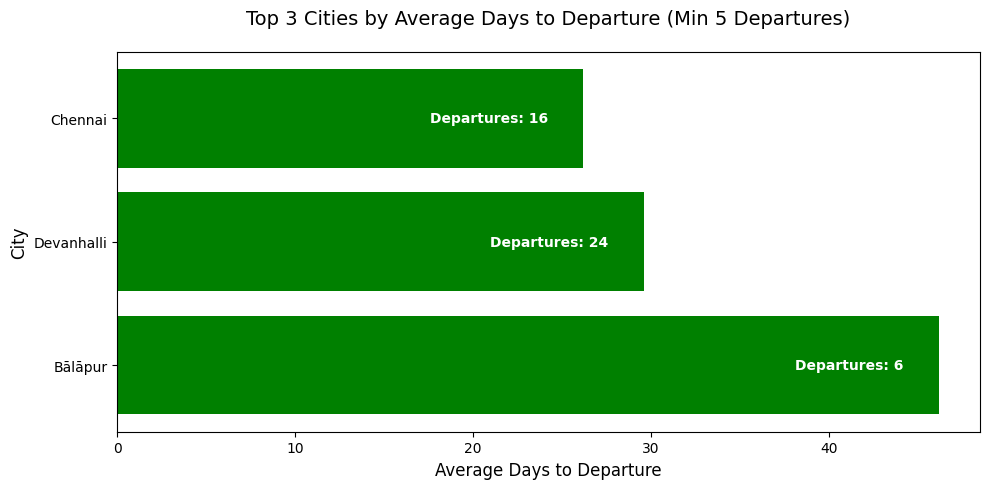

In [21]:
import matplotlib.pyplot as plt

# Create a horizontal bar chart
plt.figure(figsize=(10, 5))
bars = plt.barh(
    top_3_cities['from_city'],
    top_3_cities['avg_days_to_departure'],
    color='green'
)

# Add labels and title
plt.xlabel('Average Days to Departure', fontsize=12)
plt.ylabel('City', fontsize=12)
plt.title('Top 3 Cities by Average Days to Departure (Min 5 Departures)', fontsize=14, pad=20)

# Annotate number of departures on the bars
for bar, num_departures in zip(bars, top_3_cities['num_of_departures']):
    plt.text(
        bar.get_width() - 2,  # Position text at the end of the bar
        bar.get_y() + bar.get_height()/2,  # Vertical alignment
        f'Departures: {num_departures}',
        va='center',
        ha='right',
        color='white',
        fontweight='bold'
    )

# Adjust layout and display
plt.tight_layout()
plt.show()

## Correlation Heatmap of Numerical Features in Bookings Data: Identifying the Strongest Relationships

7.  Plot a heatmap displaying correlations of the numerical column and report which pair of numerical columns in the bookings data set, have the maximum correlation?

In [22]:
bookings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 339 entries, 0 to 338
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   customer_id        339 non-null    object             
 1   booking_id         339 non-null    object             
 2   from_city          339 non-null    object             
 3   from_country       339 non-null    object             
 4   to_city            339 non-null    object             
 5   to_country         339 non-null    object             
 6   booking_time       339 non-null    datetime64[ns, UTC]
 7   device_type_used   339 non-null    object             
 8   INR_Amount         339 non-null    float64            
 9   service_name       339 non-null    object             
 10  no_of_passengers   339 non-null    float64            
 11  days_to_departure  339 non-null    float64            
 12  distance_km        339 non-null    float64        

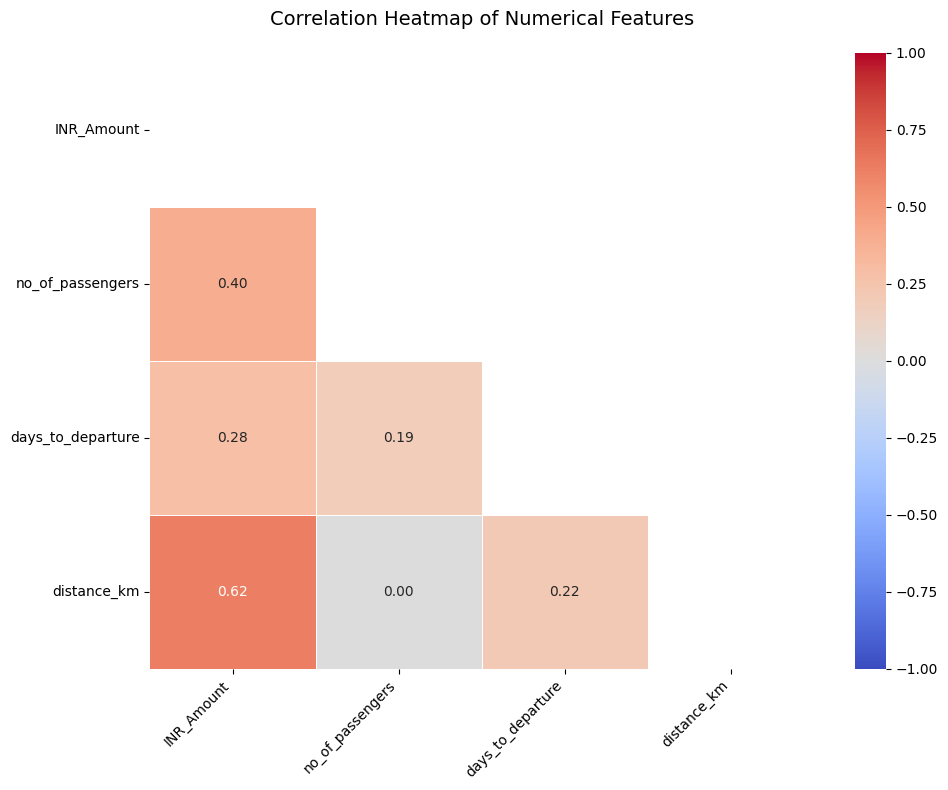


Maximum correlation: 0.62 between INR_Amount and distance_km


In [23]:
# Select Numerical Columns (float64)
numerical_cols = ['INR_Amount','no_of_passengers','days_to_departure','distance_km']
numerical_df = bookings_df[numerical_cols]

# Calculate correlation matrix
corr_matrix = numerical_df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt='.2f',
    mask=np.triu(np.ones_like(corr_matrix, dtype=bool)),
    vmin=-1,
    vmax=1,
    cmap='coolwarm',
    linewidths=0.5
    )

plt.title('Correlation Heatmap of Numerical Features', pad=20, fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Find maximum correlation pair (excluding self-correlation)
corr_stack = corr_matrix.stack()
corr_stack = corr_stack[corr_stack.index.get_level_values(0) != corr_stack.index.get_level_values(1)]
max_corr_pair = corr_stack.idxmax()
max_corr_value = corr_stack.max()

print(f"\nMaximum correlation: {max_corr_value:.2f} between {max_corr_pair[0]} and {max_corr_pair[1]}")

**Interpretation Guidance :**
* Values closer to 1 (red) indicate strong positive relationships
* Values closer to -1 (blue) show inverse relationships
* Values near 0 (white) suggest no linear correlation

## Most Used Device by Service
8.  For each service, which is the most used device type for making bookings on the platform?

In [24]:
# Group by Service Name and Count number of times per device used.
service_device_group = bookings_df.groupby('service_name')['device_type_used'].value_counts()

# Identify most used device for each service
most_used_device = service_device_group.groupby('service_name').idxmax()

most_used_device

,count
service_name,
GOIBIBO,"(GOIBIBO, IOS)"
MMT,"(MMT, Desktop)"
YATRA,"(YATRA, Desktop)"


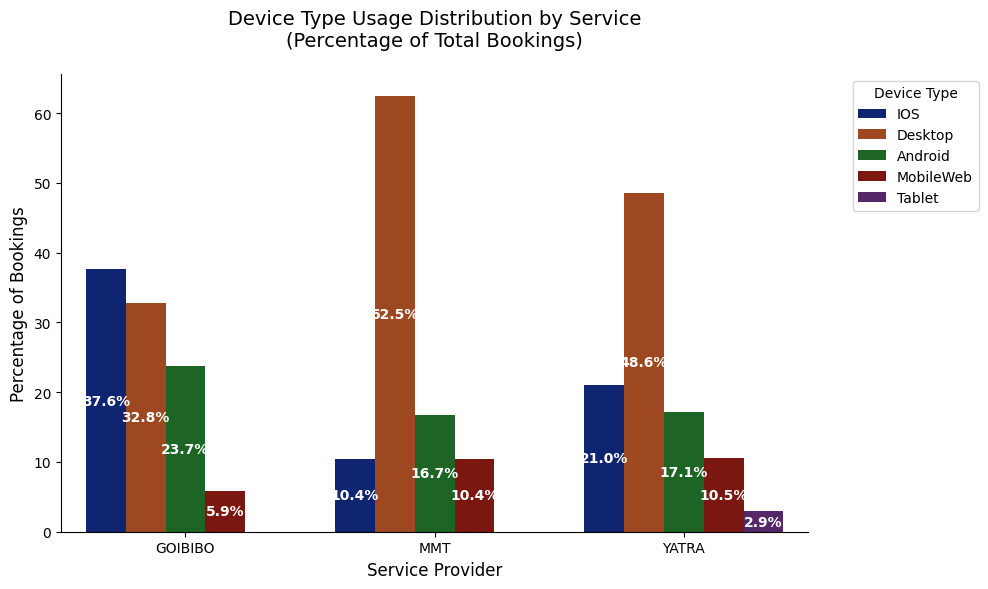

In [25]:
# Visualization for the grouped Data
service_device_df = service_device_group.reset_index(name='count')

# Calculate Percentages
total_counts = service_device_df.groupby('service_name')['count'].transform('sum')
service_device_df['percentage'] = ((service_device_df['count'] / total_counts) * 100).round(1)

# Create visualization
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x='service_name',
    y='percentage',
    hue='device_type_used',
    data=service_device_df,
    palette='dark',
    estimator=sum,
    errorbar=None
)

# Add annotations and styling
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    if height > 0:  # Only annotate bars with height > 0
        ax.annotate(
            f'{height:.1f}%',
            (x + width/2, y + height/2),
            ha='center',
            va='center',
            color='white',
            fontweight='bold'
        )

plt.title('Device Type Usage Distribution by Service\n(Percentage of Total Bookings)', pad=20, fontsize=14)
plt.xlabel('Service Provider', fontsize=12)
plt.ylabel('Percentage of Bookings', fontsize=12)
plt.legend(title='Device Type', bbox_to_anchor=(1.05, 1), loc='upper left')
sns.despine()

plt.tight_layout()
plt.show()

Using Horizontal Stacked Bars

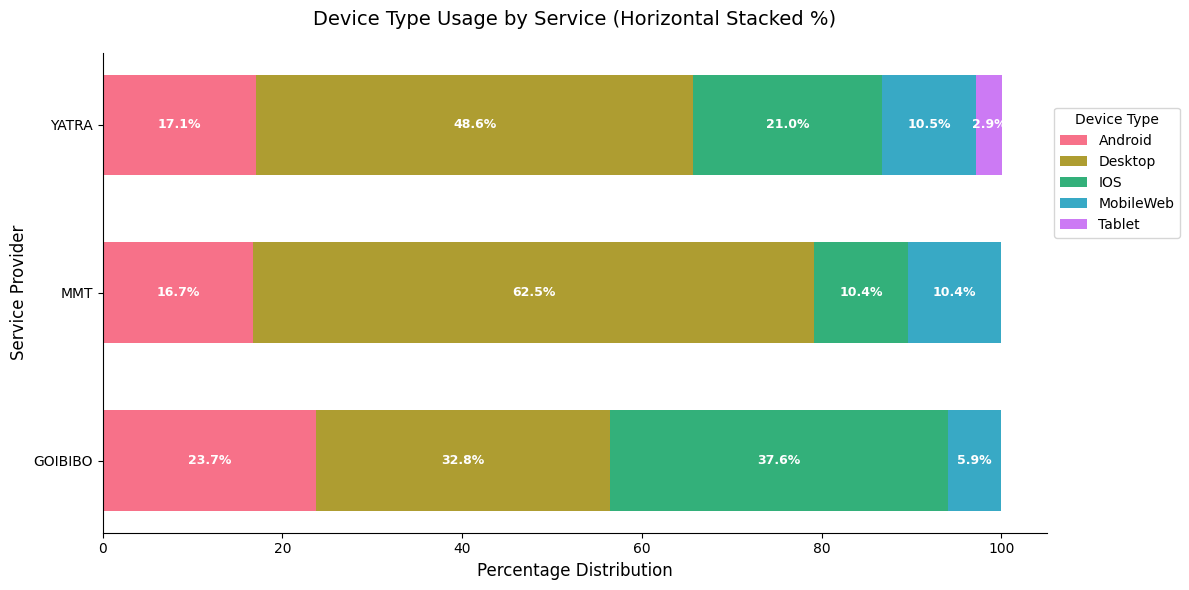

In [26]:
# Prepare data with percentages
service_device_df = service_device_group.reset_index(name='counts')
total_counts = service_device_df.groupby('service_name')['counts'].transform('sum')
service_device_df['pct'] = (service_device_df['counts'] / total_counts * 100).round(1)

# Create pivot table for stacking
pivot_df = service_device_df.pivot(index='service_name',
                                  columns='device_type_used',
                                  values='pct').fillna(0)

# Custom color palette
palette = sns.color_palette("husl", n_colors=pivot_df.shape[1])

# Plot horizontal stacked bars
fig, ax = plt.subplots(figsize=(12, 6))

# Track cumulative width for stacking
left = np.zeros(len(pivot_df))

for idx, device in enumerate(pivot_df.columns):
    widths = pivot_df[device].values
    ax.barh(pivot_df.index, widths, left=left, height=0.6,
            label=device, color=palette[idx])

    # Smart annotations
    for i, (service, w) in enumerate(zip(pivot_df.index, widths)):
        if w > 0:
            x_pos = left[i] + w/2
            ax.text(x_pos, i, f'{w:.1f}%',
                    ha='center', va='center',
                    color='white', fontsize=9,
                    fontweight='bold')
    left += widths

# Formatting
ax.set_xlabel('Percentage Distribution', fontsize=12)
ax.set_ylabel('Service Provider', fontsize=12)
ax.set_title('Device Type Usage by Service (Horizontal Stacked %)', pad=20, fontsize=14)
ax.legend(bbox_to_anchor=(1, 0.9), title='Device Type')
sns.despine()
plt.tight_layout()
plt.show()

DataFrame representing the most used devices per service_name

In [29]:
most_used_devices = service_device_df.loc[
    service_device_df.groupby('service_name')['counts'].idxmax()
][['service_name', 'device_type_used', 'counts']]

most_used_devices.rename(
    columns={
        'service_name':'Service',
        'device_type_used':'Most Used Device',
        'counts':'Bookings Count'
        }, inplace=True)

most_used_devices

,Service,Most Used Device,Bookings Count
0,GOIBIBO,IOS,70
4,MMT,Desktop,30
8,YATRA,Desktop,51


## Quarterly Booking Trends by Device Type: A Time Series Analysis
9.  Plot the trends at a quarterly frequency for the number of bookings by each of the device types, that is, plot a time series for each year and quarter showing the number of bookings performed by each device type.

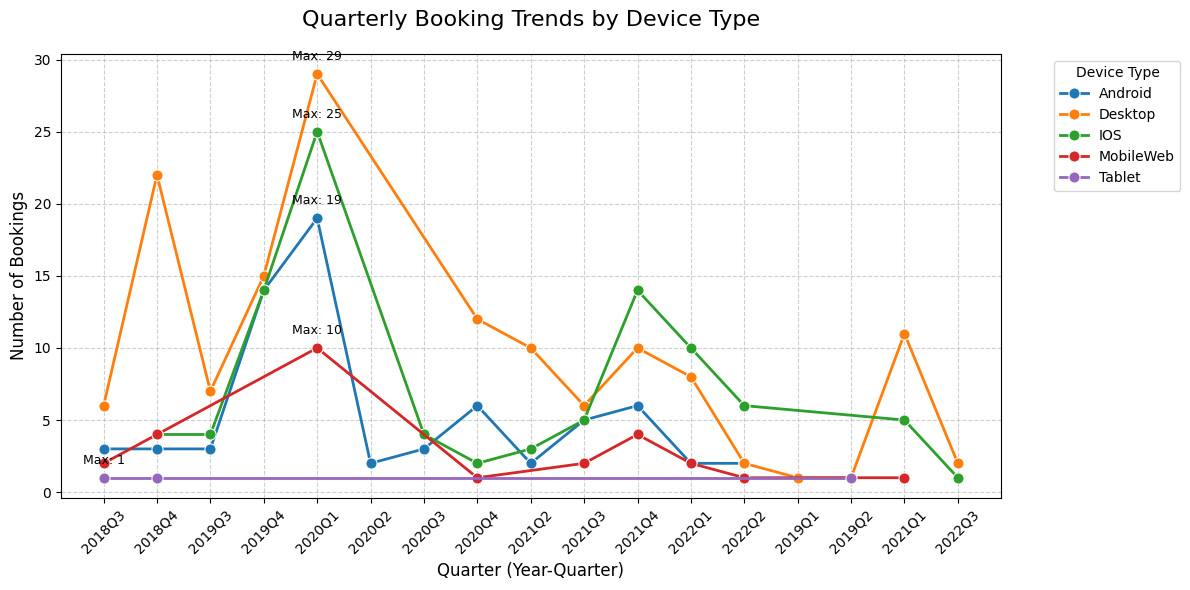

In [30]:
# Extract Quarter and Yead
bookings_df['quarter'] = bookings_df['booking_time'].dt.tz_localize(None).dt.to_period('Q') #Remove timezone info (dt.tz_localize(None))

# Convert to String for Plotting
bookings_df['year_quarter'] = bookings_df['quarter'].astype(str)

# Aggregate bookings by device and quarter
trend_df = bookings_df.groupby(['device_type_used', 'year_quarter'])['booking_id'].count().reset_index()

trend_df.rename(columns={'booking_id':'bookings_count'}, inplace=True)

# Plot Time Series
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=trend_df,
    x='year_quarter',
    y='bookings_count',
    hue='device_type_used',
    linewidth=2,
    marker='o',
    markersize=8,
    palette='tab10'
)

# Formatting of the graph
plt.title('Quarterly Booking Trends by Device Type', fontsize=16, pad=20)
plt.xlabel('Quarter (Year-Quarter)', fontsize=12)
plt.ylabel('Number of Bookings', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Device Type', bbox_to_anchor=(1.05, 1), loc='upper left')

# Annotate peaks
max_bookings = trend_df.loc[trend_df.groupby('device_type_used')['bookings_count'].idxmax()]
for _, row in max_bookings.iterrows():
    plt.annotate(
        f"Max: {row['bookings_count']}",
        (row['year_quarter'], row['bookings_count']),
        textcoords="offset points",
        xytext=(0,10),
        ha='center',
        fontsize=9
    )

plt.tight_layout()
plt.show()

## Overall Booking to Search Ratio
10. Consider the following example:

  12 customers performed a total of 100 searches but only a few of them performed 10 bookings in total.

  Searches = 100 bookings = 10 customers = 12

  The overall booking to search ratio, Ober, is 10/100 = 0.1 Using the above information/context, answer the following:
  * What is the average oBSR for each month of the year?
  * What is the average oBSR for each day of the week?
  * Plot a time series of oBSR on all the given dates.

---
*Step 1: Data Preparation*


In [64]:
# Convert timestamps to extract required periods
sessions_df['search_time'] = pd.to_datetime(sessions_df['search_time'], format='mixed') # Fixing mixed timestamps by using format='mixed'
sessions_df['month_year'] = sessions_df['search_time'].dt.strftime('%B %Y')
sessions_df['day_of_week'] = sessions_df['search_time'].dt.day_name()
sessions_df['date'] = sessions_df['search_time'].dt.date

# Count bookings (non-null of booking_id = actual booking made)
sessions_df['booking_made'] = sessions_df['booking_id'].notna().astype(int)

*Step 2: Calculate the oBSR Metrics*

In [66]:
# Monthly oBSR
monthly_obsr = sessions_df.groupby('month_year').agg(
    total_searches = ('search_id', 'count'),
    total_bookings = ('booking_made', 'sum')
).reset_index()

monthly_obsr['oBSR'] = monthly_obsr['total_bookings'] / monthly_obsr['total_searches']

monthly_obsr.head(8)


,month_year,total_searches,total_bookings,oBSR
0,April 2021,32,8,0.250000
1,April 2022,8,3,0.375000
2,August 2019,7,2,0.285714
3,August 2020,4,3,0.750000
4,August 2021,19,4,0.210526
5,December 2018,35,8,0.228571
6,December 2019,122,27,0.221311
7,December 2020,6,4,0.666667


In [55]:
# Daily oBSR (by day of week)
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_obsr = sessions_df.groupby('day_of_week').agg(
    total_searches = ('search_id', 'count'),
    total_bookings = ('booking_made', 'sum')
).reset_index()

daily_obsr['day_of_week'] = pd.Categorical(daily_obsr['day_of_week'], categories=weekday_order, ordered=True)
daily_obsr = daily_obsr.sort_values('day_of_week')
daily_obsr['oBSR'] = daily_obsr['total_bookings'] / daily_obsr['total_searches']

daily_obsr

,day_of_week,total_searches,total_bookings,oBSR
1,Monday,254,54,0.212598
5,Tuesday,218,62,0.284404
6,Wednesday,217,36,0.165899
4,Thursday,292,70,0.239726
0,Friday,203,57,0.280788
2,Saturday,200,49,0.245000
3,Sunday,113,38,0.336283


In [60]:
# Time Series (Daily oBSR)
daily_ts = sessions_df.groupby('date').agg(
    total_searches = ('search_id', 'count'),
    total_bookings = ('booking_made', 'sum')
).reset_index()

daily_ts['oBSR'] = daily_ts['total_bookings'] / daily_ts['total_searches']
daily_ts['oBSR'] = daily_ts['oBSR'].fillna(0) # Handle Days with no bookings

daily_ts.head()

,date,total_searches,total_bookings,oBSR
0,2018-09-04,3,1,0.333333
1,2018-09-11,2,2,1.000000
2,2018-09-21,5,2,0.400000
3,2018-09-23,1,1,1.000000
4,2018-09-24,3,1,0.333333


*Step 3: Visualization of oBSR for All Dates*

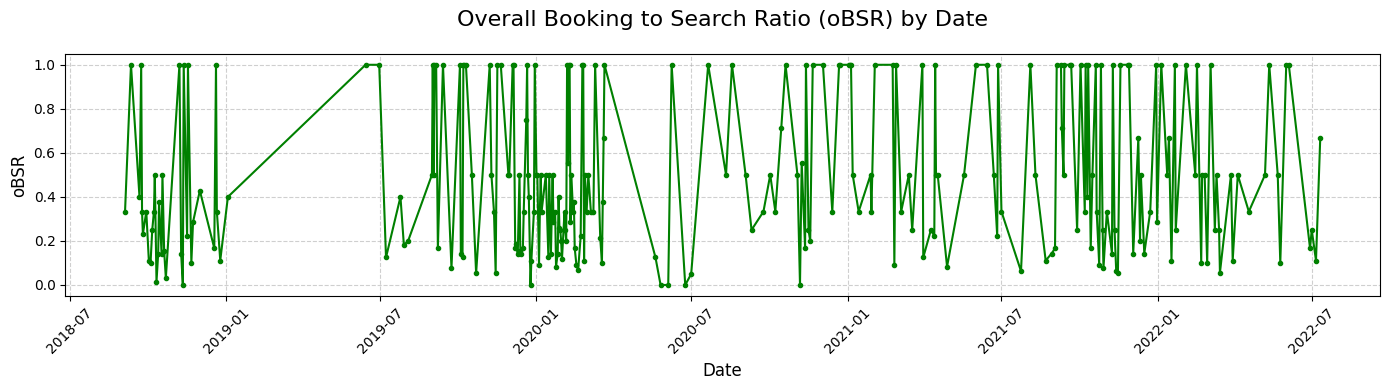

In [71]:
plt.figure(figsize=(14, 4))
plt.plot(daily_ts['date'], daily_ts['oBSR'], marker='o', markersize=3, color='green')
plt.title('Overall Booking to Search Ratio (oBSR) by Date', fontsize=16, pad=20)
plt.xlabel('Date', fontsize=12)
plt.ylabel('oBSR', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()